# Classifying Simpsons!

Let's build a neural network for recognizing simpson characters using keras. 

## Data exploration and Preprocessing
Let's take a look at the data set.

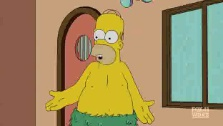

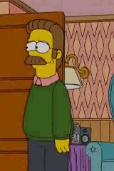

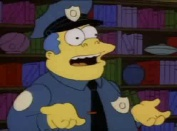

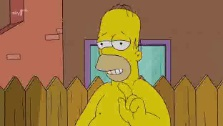

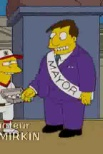

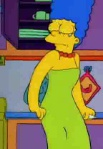

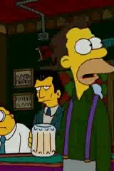

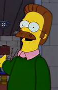

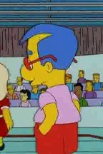

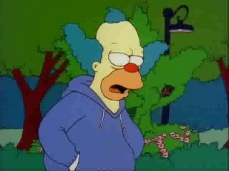

In [5]:
from os import listdir
from os.path import isfile, join

import random 

# For displaying images
from IPython.display import Image
from IPython.display import display

mypath = 'simpson'
onlyfiles = [mypath + "/" + f for f in listdir(mypath) if f.endswith(".jpg")]

random.shuffle(onlyfiles)

for file in onlyfiles[:10]:
    img = Image(file)
    display(img)


Great! Time to make arrays of our images, and encode our labels! 

In [6]:
# Build our data and labels!
import pprint

import math

import numpy as np
import PIL.Image as Image

from keras.utils import to_categorical

max_size = np.zeros(shape=(2,))

data = list()
labels = list()

for file in onlyfiles[:350]:
    
    # Get image as a numpy array
    im = Image.open(file)
    
    imarray = np.array(im)
    #print(imarray.shape)
    
    # So we can pad the images so they are all the same size
    if imarray.shape[0] > max_size[0]:
        max_size[0] = imarray.shape[0]
    
    if imarray.shape[1] > max_size[1]:
        max_size[1] = imarray.shape[1]
    
    # Get the labels
    tokens = file.rsplit('_', 1)
    label = tokens[0].split('/')[1]
    #print(label)
    
    data.append(imarray)
    labels.append(label)

print('max width: %d, max height: %d' % (max_size[0], max_size[1]))    
    
# Pad the images to max width and max height
data = np.asarray(data)
new_data = list()
for img in data:
    img_new = np.zeros(shape=(int(max_size[0]), int(max_size[1]),3))
    img_new[:img.shape[0],:img.shape[1],:] = img
    img_new /= 255.0
    new_data.append(img_new)

new_data = np.asarray(new_data)
print('data shape: ' + str(new_data.shape))

# Build the label encoding
lbl = 0
label_map = dict()
for label in labels:
    if label not in label_map:
        label_map[label] = lbl
        lbl += 1

encoded_labels = list()
for label in labels:
    encoded_labels.append(label_map[label])

bin_labels = to_categorical(encoded_labels)

# Split data into Training, Validation, and Test
num_dat = len(encoded_labels)

train_data, train_labels = new_data[: math.floor(0.75 * num_dat)], bin_labels[: math.floor(0.75 * num_dat)]
valid_data, valid_labels = new_data[math.floor(0.75 * num_dat): math.floor(0.9 * num_dat)], bin_labels[math.floor(0.75 * num_dat): math.floor(0.9 * num_dat)]
test_data, test_labels = new_data[math.floor(0.9 * num_dat):], bin_labels[math.floor(0.9 * num_dat):]



max width: 383, max height: 341
data shape: (350, 383, 341, 3)


# Time to build our model

Now that we have our data, let's build the neural model. 
We're going to construct a Convolutional Neural Network. They're especially good at classifying images.


In [7]:
# Imports..
from keras.models import Sequential # Allows us to modularly add layers with ease.
from keras.layers import Conv2D, Activation, Dense, Flatten
from keras.layers.core import Dropout
from keras.layers.normalization import BatchNormalization
from keras import losses
from keras import optimizers

model = Sequential()

# Add layers to the model

model.add(
    Conv2D(
        filters=10,
        kernel_size=5,
        activation='linear',
        strides=1,
        input_shape=(int(max_size[0]), int(max_size[1]), 3)
    )
)

# Max pool layer

# Conv2d Layer

# MAX POOL

model.add(
    BatchNormalization()
)

model.add(
    Activation('tanh')
)

model.add(
    Dropout(
        rate=0.2
    )
)

model.add(
    Flatten()
)

model.add(
    Dense(
        128, 
        activation='linear'
    )
)

model.add(
    BatchNormalization()
)

model.add(
    Activation('relu')
)

model.add(
    Dropout(
        rate=0.2
    )
)

model.add(
    Dense(
        lbl, 
        activation='softmax'
    )
)

model.compile(
    loss=losses.categorical_crossentropy,
    optimizer=optimizers.Adadelta(),
    metrics=['accuracy']
)

## Training and Validation!
Now that we have our model, it's time for training and validation phase. We'll just train for 30 epochs and look at the validation loss.

In [ ]:
print('Train data shape: ' + str(train_data.shape) + ', Train labels shape: ' + str(train_labels.shape))
print('Valid data shape: ' + str(valid_data.shape) + ', Valid labels shape: ' + str(valid_labels.shape))
print('Test data shape: ' + str(test_data.shape) + ', Test labels shape: ' + str(test_labels.shape))

# Fit the model.

history = model.fit(
    x=train_data,
    y=train_labels,
    epochs=30,
    verbose=1,
    validation_data=(valid_data, valid_labels)
)



Train data shape: (262, 383, 341, 3), Train labels shape: (262, 20)
Valid data shape: (53, 383, 341, 3), Valid labels shape: (53, 20)
Test data shape: (35, 383, 341, 3), Test labels shape: (35, 20)
Train on 262 samples, validate on 53 samples
Epoch 1/30
 32/262 [==>...........................] - ETA: 825s - loss: 3.2146 - acc: 0.0938

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Testing
Now, let's see what the net says on our test set

In [ ]:
loss = model.evaluate(
    x=test_data,
    y=test_labels
)

print('loss: ' + str(np.sum(loss)))

In [ ]:
import pprint

pp = pprint.PrettyPrinter(indent=4)

# z = zip(test_data, test_labels)
# np.random.shuffle(z)
# test_data, test_labels = zip(*z)

test_imgs = data[math.floor(0.9 * num_dat):]

num_imgs = 10

predictions = model.predict_on_batch(
    x=test_data[:num_imgs]
)

pp.pprint(predictions)

for im in test_imgs[:num_imgs]: 
    img = Image.fromarray(im, 'RGB')
    display(img)
